In [28]:
%matplotlib inline

import numpy as np # NUMPY
import pandas as pd # PANDAS
import matplotlib.pyplot as plt # MATPLOTLIB
import seaborn as sns # SEABORN
import scipy
import sklearn
from sklearn.decomposition import PCA
import cv2
import os 
from skimage import filters
from scipy import ndimage

# Vamos a escribir un expression map, primero con us Self Organizing Map

In [11]:
from numpy import random 
 
x = np.arange(5)
y = np.arange(5)
xx, yy = np.meshgrid(x, y)
xx, xx[::2]

(array([[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]),
 array([[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]))

In [3]:
b_shape = pd.read_csv('pca_shapepoints.csv',header = None)
b_structure = pd.read_csv('pca_structurepoints.csv',header = None)
b_cartoon = pd.read_csv('pca_cartoonpoints.csv',header = None)
b_texture = pd.read_csv('pca_texturepoints.csv',header = None)

In [4]:
b_shape = pd.read_csv('pca_training_shapepoints.csv',header = None)
b_structure = pd.read_csv('pca_training_structurepoints.csv',header = None)
b_cartoon = pd.read_csv('pca_cartoontrainingpoints.csv',header = None)
b_texture = pd.read_csv('pca_texturetrainingpoints.csv',header = None)

In [73]:
b_shape = pd.read_csv('pca_training_shapepoints_newT.csv',header = None)
b_structure = pd.read_csv('structure_feature_newT_vector.csv',header = None)
b_cartoon = pd.read_csv('pca_cartoonnewTpoints_.csv',header = None)
b_texture = pd.read_csv('pca_texturenewTpoints_.csv',header = None)

In [3]:
len(b_cartoon)

450

In [20]:
len(series_list)-

450

In [30]:
from glob import glob

series_list = np.sort(glob('../ck+copynewT/Landmarks/*/*/*'))
sub = 'start'
indexi = []
for i in range(0, len(series_list)):
    if (series_list[i].split('/')[3] != sub):
       # print(sub)
        #print(i)
        sub = series_list[i].split('/')[3]
    else:
        if (series_list[i].split('/')[5].split('_')[2] == '00000001'):
            indexi.append(i)
indexi = np.asarray(indexi)
indexi

array([  2,   4,   8,  10,  12,  14,  16,  20,  22,  24,  28,  30,  34,
        36,  38,  44,  46,  48,  50,  54,  56,  60,  62,  66,  68,  72,
        74,  78,  80,  82,  86,  90,  92,  96, 100, 102, 106, 108, 110,
       112, 116, 118, 122, 124, 128, 132, 134, 138, 140, 144, 148, 150,
       154, 156, 158, 162, 164, 166, 170, 172, 174, 178, 180, 182, 186,
       188, 192, 196, 198, 200, 204, 206, 208, 212, 216, 218, 222, 224,
       228, 230, 234, 236, 240, 242, 244, 248, 252, 256, 258, 262, 266,
       268, 270, 274, 276, 280, 282, 286, 288, 292, 294, 296, 302, 304,
       308, 310, 314, 316, 320, 322, 330, 332, 336, 338, 342, 344, 348,
       350, 356, 358, 360, 364, 366, 368, 370, 374, 376, 378, 382, 384,
       386, 388, 392, 394, 396, 398, 400, 402, 404, 408, 410, 412, 416,
       418, 422, 424, 426, 430, 432, 436, 442, 444, 448])

estas 2 celdas están porque no tenemos todas las imagenes del conjunto de entrenamiento todavia

In [74]:
cant_frames_per_seq = pd.read_csv('cknewT_landmark_FramePerSeq.csv',header = None)
cant_frames_per_seq = np.asarray(cant_frames_per_seq).flatten()
cant_frames_per_seq

first_frames = [0]
for i in cant_frames_per_seq:
    current = first_frames[-1] + i
    first_frames.append(current)

In [75]:

my_path = '/home/alicia/Documentos/Tesis2023/SynthesisEmotions/ck+copynewT/Landmarks/'
con = np.sort(glob(my_path + '/*/*', recursive=True))
my_path2 = '/home/alicia/Documentos/Tesis2023/SynthesisEmotions/ck+copynewT/Emotion_labels/Emotion/'
subjects = []
for i in con:
    sub, emo = str(i).split('/')[8], str(i).split('/')[9]
    path3 = my_path2 + sub +'/' + emo
    if (len(os.listdir(path3)) == 0):
        subjects.append([sub, emo])

TypeError: 'module' object is not callable

In [76]:
len(cant_frames_per_seq)

225

In [34]:
#b_shape = b_shape[0:689]
#b_structure = b_structure[0:689]

In [77]:
b_vector = np.concatenate((b_shape, b_structure), axis = 1)
b_vector = np.concatenate((b_vector, b_cartoon), axis = 1)
b_vector = np.concatenate((b_vector, b_texture), axis = 1)

In [78]:
b_vector.shape

(450, 501)

In [79]:
def get_emotions(files):
    emotions = []
    for file in files:
        with open(file) as f:
            emotion = int(float(f.readline()))
            emotions.append(emotion)
    emotions = np.asarray(emotions)
    return emotions

In [80]:
import glob
my_path = '/home/alicia/Documentos/Tesis2023/SynthesisEmotions/ck+copynewT/Emotion_labels/Emotion'


emotions = []

files = np.sort(glob.glob(my_path + '/*/*/*.txt', recursive=True))
files
emotions = get_emotions(files)
#emotions

In [81]:
len(first_frames)

226

In [82]:
def get_label_emotions(b_vector, seq_first_frames):
    b_vectors_labeled = []
    target = []
    for i in range(0,225):
        co = first_frames[i]
        sa = first_frames[i+1]
        b_vectors_labeled.append(b_vector[co])
        b_vectors_labeled.append(b_vector[sa-1])
        target.append(0)
        target.append(emotions[i])
    return b_vectors_labeled, target
    
    

In [83]:
b_vectors_labeled, target = get_label_emotions(b_vector, first_frames)

In [57]:
len(b_vector)

297

In [84]:
np.asarray(b_vectors_labeled).shape, np.asarray(target).shape

((450, 501), (450,))

In [85]:
b_vector

index_list = indexi
new_b_vector = []
for index, element in enumerate(b_vector):
    if index not in index_list:
        new_b_vector.append(element)
        
b_vectors_labeled

index_list = indexi
new_b_vector_label = []
for index, element in enumerate(b_vectors_labeled):
    if index not in index_list:
        new_b_vector_label.append(element)
        
target

index_list = indexi
new_target = []
for index, element in enumerate(target):
    if index not in index_list:
        new_target.append(element)

b_vector = np.asarray(new_b_vector)
b_vectors_labeled= np.asarray(new_b_vector_label)
target = np.asarray(new_target)
len(b_vector)

297

In [55]:
odds = np.arange(1,226, step =2)
odds

array([  1,   3,   5,   7,   9,  11,  13,  15,  17,  19,  21,  23,  25,
        27,  29,  31,  33,  35,  37,  39,  41,  43,  45,  47,  49,  51,
        53,  55,  57,  59,  61,  63,  65,  67,  69,  71,  73,  75,  77,
        79,  81,  83,  85,  87,  89,  91,  93,  95,  97,  99, 101, 103,
       105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129,
       131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155,
       157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181,
       183, 185, 187, 189, 191, 193, 195, 197, 199, 201, 203, 205, 207,
       209, 211, 213, 215, 217, 219, 221, 223, 225])

In [56]:
#target[1::2] #all apex emotions in odd index

b_vectors_labeled = np.asarray(b_vectors_labeled)
apex_vector_trained_index = np.random.choice(odds, 17,replace=False )
apex_vector_trained_index

array([223, 217,  63,  85, 193, 175,  39,  57,  53, 189,  69,  61,  33,
        79, 209,  55,  89])

Vamos a buscar las emociones labeleadas, son las numero 0 y 1



In [121]:
72/2

36.0

target son las neuronas 0 y 1 (inicio y fin de frames)


In [70]:
#Vamos a hacer varios minisom y conseguir los snapshots

stops = [1,  2, 3, 4, 5, 6, 7, 8]
stops

[1, 2, 3, 4, 5, 6, 7, 8]

In [72]:
np.sqrt(450)*5

106.06601717798213

In [59]:
np.sqrt(np.sqrt(297)*5)

9.282695712888064

In [92]:
import minisom

weights = {}
stops = [1,  2, 3, 4, 5, 6, 7, 8]

som = minisom.MiniSom(9,9,501,sigma=2,neighborhood_function='mexican_hat',learning_rate=0.1)
som.random_weights_init(b_vector)
print("Training...")
som.train_random(b_vector,stops[0], verbose=False) # training with 100 iterations
print("\n...ready!")
weights[stops[0]] = som.get_weights()

for i in range(1, len(stops[1:])):
    som = minisom.MiniSom(9,9,501,sigma=2,neighborhood_function='mexican_hat',learning_rate=0.1)
    key = stops[i-1] 
    som._weights = weights[key]
    print("Training...")
    som.train_random(b_vector,stops[i], verbose=False) # training with 100 iterations
    print("\n...ready!")
    weights[stops[i]] = som.get_weights()

Training...

...ready!
Training...

...ready!
Training...

...ready!
Training...

...ready!
Training...

...ready!
Training...

...ready!
Training...

...ready!


In [65]:
weights[1].shape

(9, 9, 501)

In [100]:
weights[1]
suma = 0
for i in range(0, len(weights[1])):
    for j in range(0, len(weights[1][0])):
        suma = suma +  np.abs(weights[5][i][j] - weights[1][i][j])
error = suma/(9*9)
error

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [32]:
suggeted_number =  5*np.sqrt(len(b_vector))
suggeted_number #11, we use 10

131.24404748406687

### El SOM normal


In [25]:
import minisom
### Initialization and training ###
som = minisom.MiniSom(10,10,70,sigma=2,learning_rate=0.2)#hay 8x8 neuronas(64)
som.random_weights_init(b_vector)
print("Training...")
som.train_random(b_vector,10000, verbose=True) # training with 100 iterations
print("\n...ready!")

Training...
 [ 30000 / 30000 ] 100% - 0:00:00 left 
 quantization error: 100.8385136870924

...ready!


In [26]:
som.topographic_error(b_vector)



0.03773584905660377

448


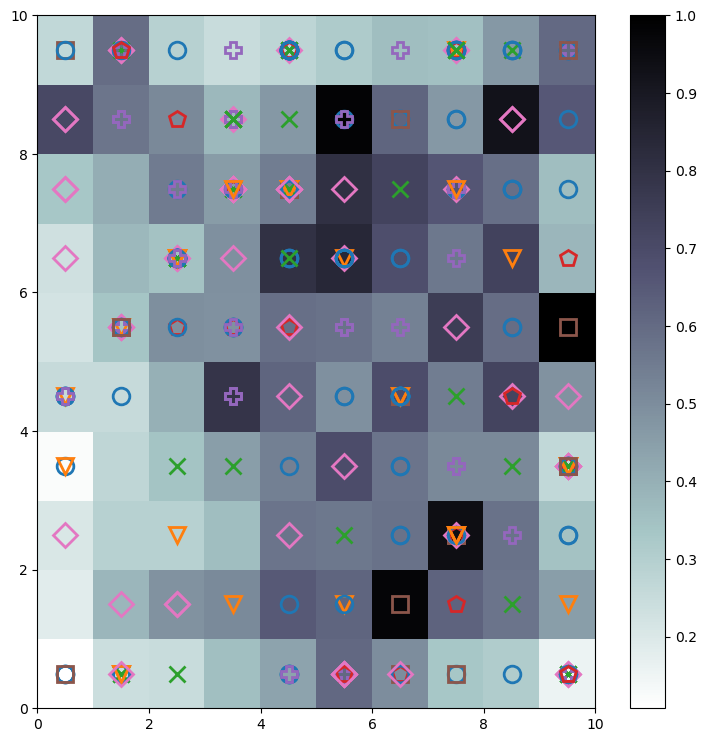

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(9, 9))

plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()


## Plotting the response for each pattern in the iris dataset
## different colors and markers for each label
markers = ['o','v','NO', 'x', 'p', 'P','s','D' ]
colors = ['C0', 'C1', 'NO', 'C2', 'C3', 'C4','C5', 'C6']
for cnt, xx in enumerate(b_vectors_labeled):     
    w = som.winner(xx)  # getting the winner    
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[target[cnt]], markerfacecolor='None',
             markeredgecolor=colors[target[cnt]], markersize=12, markeredgewidth=2)
print(len(b_vectors_labeled))
plt.show()

In [87]:
def get_labeled_neurons(labeled_vectors, emo_target, emptyDic, somap):
    dic = somap.win_map(labeled_vectors,return_indices=True )
    emotion_targets = emo_target
    counters = []
    for key in dic:
        space = np.zeros(len(dic[key]), dtype = int)
        for i in range(0, len(dic[key])):
            val = dic[key]       
            space[i] = emotion_targets[val[i]]
        counters.append(space)
    for cnt, key in enumerate(dic):
        emptyDic[key] = max(counters[cnt])    
    return 0

In [51]:
MyDic = {}    
a =get_labeled_neurons(b_vectors_labeled, target,MyDic  )


In [88]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
def draw_labeled_neurons_map(somap, MyDic,savepath, formato):
    plt.figure(figsize=(7,7))

    plt.pcolor(somap.distance_map().T, cmap='bone_r')  # plotting the distance map as background
    plt.colorbar()

    ## Plotting the response for each pattern in the iris dataset
    ## different colors and markers for each label
    blue_star = mlines.Line2D([], [], color='blue', marker='o', linestyle='None',
                          markersize=10, label='Blue stars')
    red_square = mlines.Line2D([], [], color='orange', marker='v', linestyle='None',
                          markersize=10, label='Red squares')
    purple_triangle = mlines.Line2D([], [], color='green', marker='x', linestyle='None',
                          markersize=10, label='Purple triangles')
    green_star = mlines.Line2D([], [], color='red', marker='p', linestyle='None',
                          markersize=10, label='Blue stars')
    orange_square = mlines.Line2D([], [], color='purple', marker='P', linestyle='None',
                          markersize=10, label='Red squares')
    yellow_triangle = mlines.Line2D([], [], color='brown', marker='s', linestyle='None',
                          markersize=10, label='Purple triangles')
    black_triangle = mlines.Line2D([], [], color='pink', marker='D', linestyle='None',
                          markersize=10, label='Purple triangles')

    markersleg = [blue_star, red_square, purple_triangle, green_star, orange_square,yellow_triangle, black_triangle   ]

    #markers = [1,2,3,4,5,6,7]
    markers = ['o','v', 'x', 'p', 'P','s','D' ]
    colors = ['C0', 'C1', 'C2', 'C3', 'C4','C5', 'C6']
    lala = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sadness', 'Surprise', 'Neutral'] 
    for key in MyDic:
        # palce a marker on the winning position for the sample xx
        w = key  
        sign = MyDic[key]
        if sign > 2:#no hay labels 2 porque las filtramos al hacer la base de dates
            sign = sign -1
        plt.plot(w[0]+.5, w[1]+.5, markers[sign], markerfacecolor='None',
                 markeredgecolor=colors[sign], markersize=12, markeredgewidth=2)


    lgd = plt.legend(handles = markersleg, labels = lala, bbox_to_anchor=(0, 1), loc='upper right', ncol=1)

    plt.title('Clasificación del Expression Map')
    #b_tuple = tuple(map(tuple, b_vector))     
    plt.savefig(savepath,  bbox_extra_artists=(lgd,), bbox_inches='tight',format=formato)
    plt.show()
    return 0
    

In [21]:
pathi = '/home/alicia/Documentos/Tesis2023/SynthesisEmotions/Notebook/expression_map_white3.png'
draw_labeled_neurons_map(som, MyDic, pathi, 'png')

NameError: name 'MyDic' is not defined


#Vamos a hacer la imagen para cada som de los weigths (que son como snapshots de la evolucion del mapa)




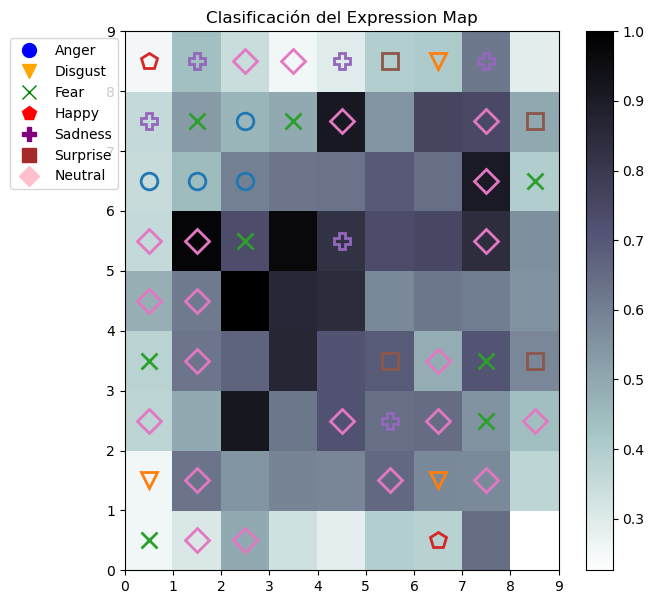

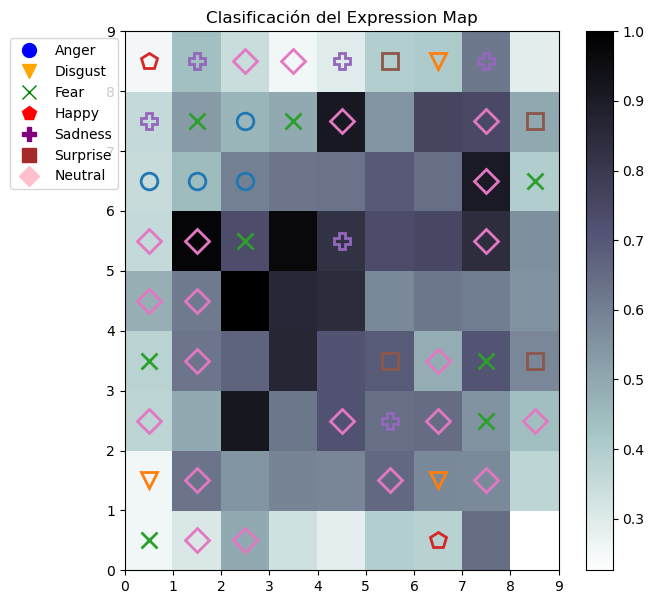

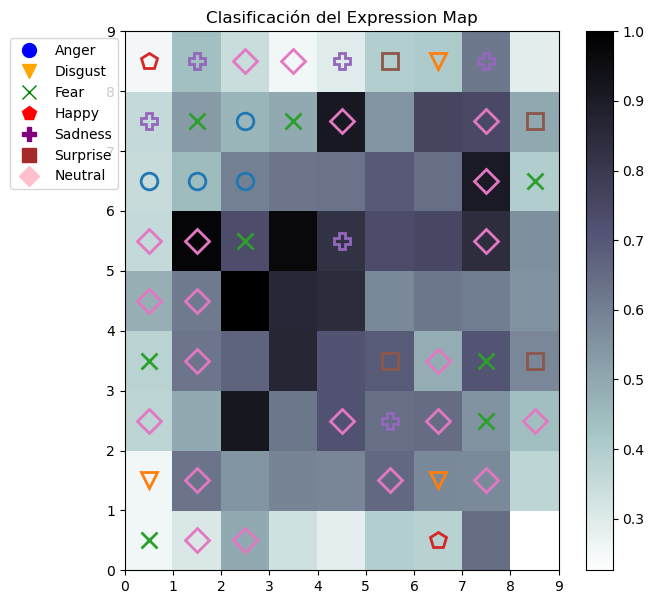

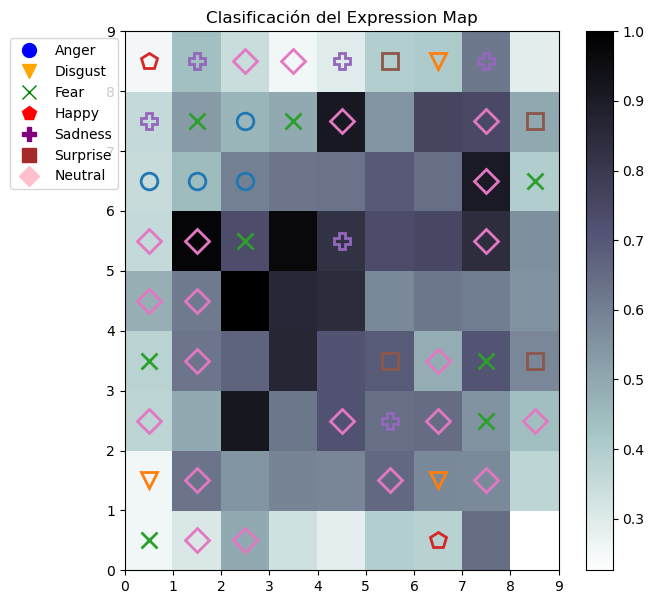

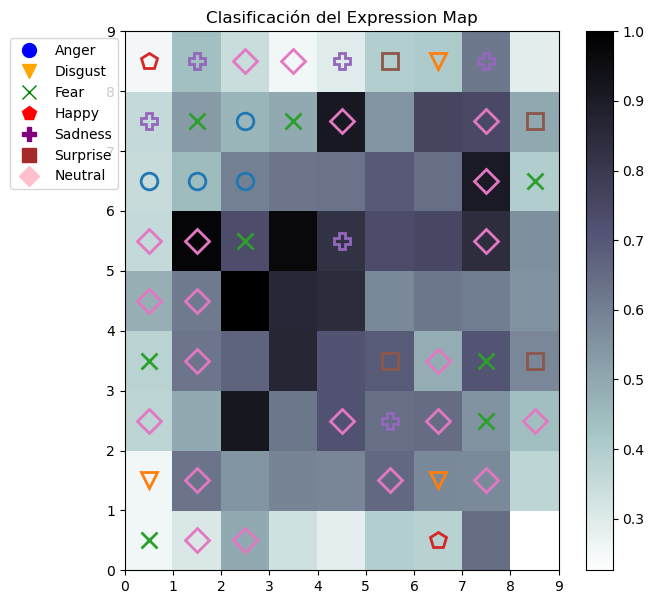

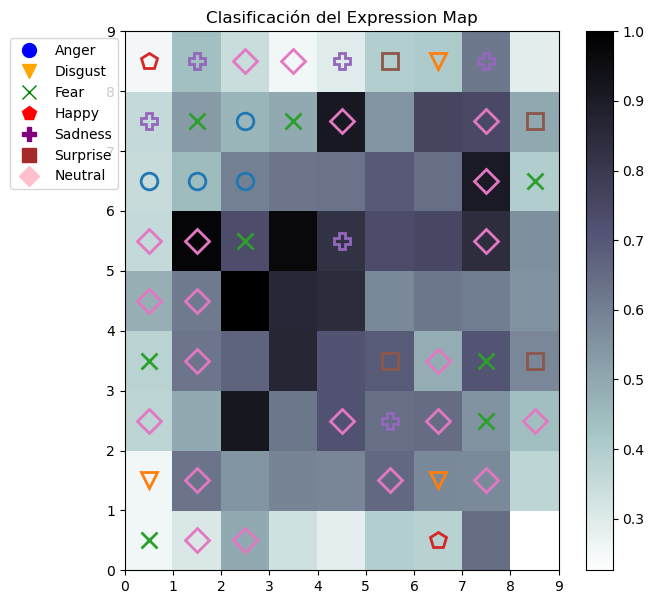

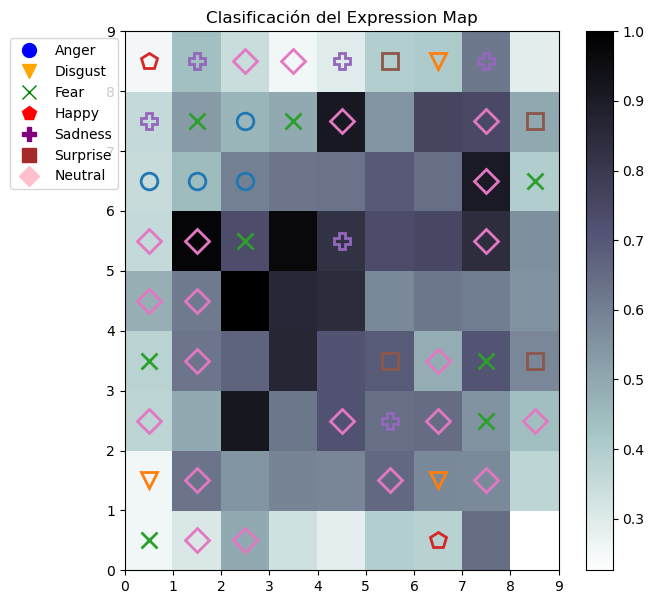

In [93]:
#generamos una instancia de som por cada parada, y luego la graficamos

for key in weights.keys():
    actual_weights = weights[key]
    som = minisom.MiniSom(9,9,501,sigma=2,neighborhood_function='mexican_hat',learning_rate=0.1)#hay 8x8 neuronas(64)
    som._weights = weights[key]
    #vectors_labeled, target = get_label_emotions(b_vector, first_frames)
    vectors_labeled, target = b_vectors_labeled, target
    actual_labeledneurons_dic = {}
    get_labeled_neurons(vectors_labeled, target, actual_labeledneurons_dic, som)
    savepath = '/home/alicia/Documentos/Tesis2023/SynthesisEmotions/Notebook/expression_map_snapshot' +str(key) + '_white.png'
    draw_labeled_neurons_map(som, actual_labeledneurons_dic,savepath, 'png')
    
    

448


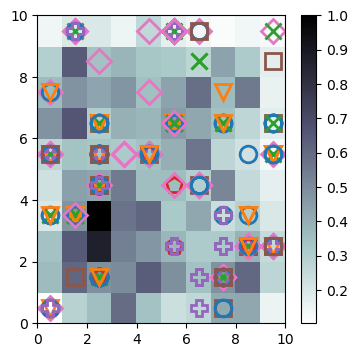

448


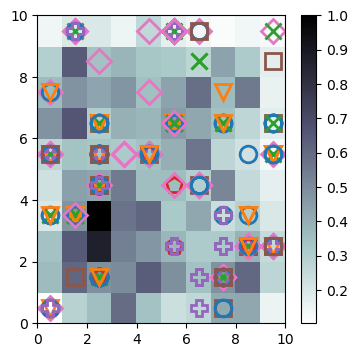

448


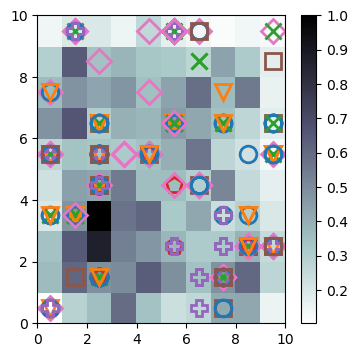

448


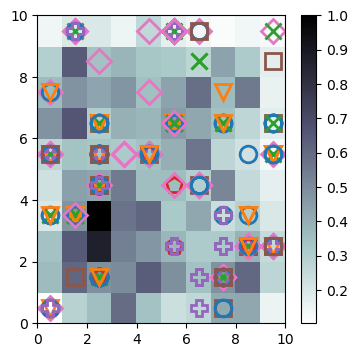

448


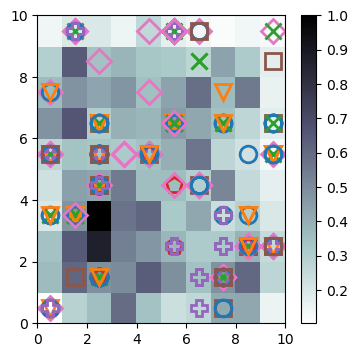

448


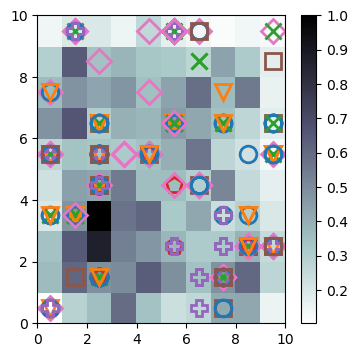

448


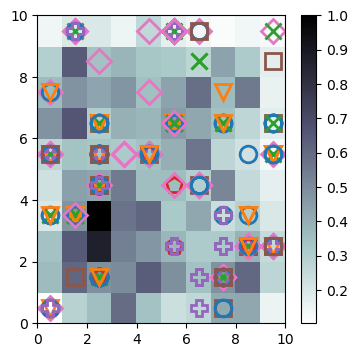

In [99]:
import matplotlib.pyplot as plt
%matplotlib inline

for key in weights.keys():
    actual_weights = weights[key]
    som = minisom.MiniSom(10,10,501,sigma=4,learning_rate=10)#hay 8x8 neuronas(64)
    som._weights = weights[key]
    plt.figure(figsize=(4, 4))

    plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
    plt.colorbar()


    ## Plotting the response for each pattern in the iris dataset
    ## different colors and markers for each label
    markers = ['o','v','NO', 'x', 'p', 'P','s','D' ]
    colors = ['C0', 'C1', 'NO', 'C2', 'C3', 'C4','C5', 'C6']
    for cnt, xx in enumerate(b_vectors_labeled):     
        w = som.winner(xx)  # getting the winner    
        # palce a marker on the winning position for the sample xx
        plt.plot(w[0]+.5, w[1]+.5, markers[target[cnt]], markerfacecolor='None',
             markeredgecolor=colors[target[cnt]], markersize=12, markeredgewidth=2)
    print(len(b_vectors_labeled))
    plt.show()

In [ ]:
#Vamos a ver la tasa de clasificación de secuencias normales 

#(agarro varias secuencias y miro que las cosas esten bien (que clasifique) )

In [146]:
b_vectors_labeled = np.asarray(b_vectors_labeled)
#target is high up
apex_vector_trained_index = np.random.choice(odds, 17,replace=False )
apex_vector_trained_index # target

actual_weights = weights[key]
som = minisom.MiniSom(10,10,70,sigma=3,learning_rate=0.8)#hay 8x8 neuronas(64)
som._weights = weights[50000]


actual_labeledneurons_dic = {}
get_labeled_neurons(vectors_labeled, target, actual_labeledneurons_dic, som)

correct_labels_quanti = 0

for i in apex_vector_trained_index:
    actual_emotion = target[i]
    winning_neuron = som.winner(b_vectors_labeled[i])
    labeled_emotion = actual_labeledneurons_dic[winning_neuron]
    if actual_emotion == labeled_emotion:
        correct_labels_quanti = correct_labels_quanti + 1
error_tass = 1- (correct_labels_quanti/len(apex_vector_trained_index))
        

In [147]:
error_tass

0.11764705882352944


Ahora vamos a tratar de, dado imagenes nuevas, clasificarlas en el som y que nos den la emocion correspondiente



In [32]:
import glob
from pathlib import Path

mypath  = '/home/alicia/Documentos/Tesis2023/SynthesisEmotions/ck+copy/extended-cohn-kanade-images/cohn-kanade-images'

test_images_labels = {}
test_images = []


test_images = []
files =  Path(mypath).rglob("*")
for file in files:
    if file.is_dir():
        if len(os.path.normpath(file).split(os.path.sep)) == 11:
            test_images.append(file)
            
        
len(test_images)
sub, em = str(test_images[0]).split('/')[9], str(test_images[0]).split('/')[10]
#for file in files:    
#   if int((os.path.splitext(file.split('_')[2])[0])) == 0:
#       test_image_labels[file] = 0
#   else:
#       test_images.append(file)    
#test_images = np.asarray(test_images)
#files

In [33]:
    
subject_number = np.random.choice(test_images, 40, replace=False )
for i in subject_number:    
    sub, em = str(i).split('/')[9],str(i).split('/')[10]
    mypath = '/home/alicia/Documentos/Tesis2023/SynthesisEmotions/ck+copy/Emotion_labels/Emotion/'
    mypath = mypath + sub + '/' + em    
    files = np.sort(glob.glob(mypath + '/**/*.txt', recursive=True))   
    for file in files:
        with open(file) as f:
            emotion = int(float(f.readline()))
            test_images_labels[str(i)] =emotion
test_images_labels #imagenes de prueba a las que le debemos sacar los vectores b

#debemos buscar el b_vector

#b_vector = [b_shape, b_estructure, b_texture]

#debemos alinear los landmarks e imagenes de cada secuencia a la imagen de referencia.
#Para cada 1
#debemos hacer la resta con frame 0
#debemos restarle la media
#debemos usarlo con el PCA
#debemos 



{'/home/alicia/Documentos/Tesis2023/SynthesisEmotions/ck+copy/extended-cohn-kanade-images/cohn-kanade-images/S136/003': 6,
 '/home/alicia/Documentos/Tesis2023/SynthesisEmotions/ck+copy/extended-cohn-kanade-images/cohn-kanade-images/S080/005': 6,
 '/home/alicia/Documentos/Tesis2023/SynthesisEmotions/ck+copy/extended-cohn-kanade-images/cohn-kanade-images/S502/001': 1,
 '/home/alicia/Documentos/Tesis2023/SynthesisEmotions/ck+copy/extended-cohn-kanade-images/cohn-kanade-images/S042/001': 7,
 '/home/alicia/Documentos/Tesis2023/SynthesisEmotions/ck+copy/extended-cohn-kanade-images/cohn-kanade-images/S107/005': 3,
 '/home/alicia/Documentos/Tesis2023/SynthesisEmotions/ck+copy/extended-cohn-kanade-images/cohn-kanade-images/S080/001': 7,
 '/home/alicia/Documentos/Tesis2023/SynthesisEmotions/ck+copy/extended-cohn-kanade-images/cohn-kanade-images/S063/001': 7,
 '/home/alicia/Documentos/Tesis2023/SynthesisEmotions/ck+copy/extended-cohn-kanade-images/cohn-kanade-images/S127/004': 5,
 '/home/alicia/D

In [35]:
#Tenemos que hacer los shape de forma, estructura, y textura.

#Forma -> tenemos que alinear landmarks a reference shape

#Primero encontramos los landmarks

import glob

path = '../ck+copytraining/extended-cohn-kanade-images/cohn-kanade-images/'

images = [f for f in glob.glob(path + "**/*.png", recursive=True)]

images = np.sort(np.asarray(images))
reference_image_path = images[0]

#images[0]es la imagen de referencia. Debemos conseguir sus landmarks.

(3614,)
(490, 640)


In [192]:
%run auxfunctions.ipynb

### Vamos por b_shape


In [56]:
exampletestfolder = '/home/alicia/Documentos/Tesis2023/SynthesisEmotions/ck+copy/extended-cohn-kanade-images/cohn-kanade-images/S136/003'
sub_number =  os.path.normpath(exampletestim).split(os.path.sep)[9]
emo_number =  os.path.normpath(exampletestim).split(os.path.sep)[10]
sub_number, emo_number

landmarks_path = '/home/alicia/Documentos/Tesis2023/SynthesisEmotions/ck+copy/Landmarks/'+ sub_number+'/' + emo_number 


files = [f for f in glob.glob(landmarks_path + "/*.txt", recursive=True)]

landmarks_seqXY = get_landmarks_of_folder(files)
landmarks_seqXY.shape #tengo los landmarks de toda la secuencia

cant_de_frames = len(landmarks_seqXY)
cant_de_frames



14

In [66]:
import glob

path = '../ck+copy/extended-cohn-kanade-images/cohn-kanade-images/' + sub_number+'/' + emo_number 

imagestest = [f for f in glob.glob(path + "**/*.png", recursive=True)]

imagestest = np.sort(np.asarray(images))
imagestest.shape

(14,)

In [ ]:
#ahora tenemos que alinear los landmarks con la reference shape y transformar las imagenes

In [64]:
intercalated_data = intercalate_data_of_vectors(landmarks_seqXY, 0)
intercalated_data.shape

(14, 136)

In [90]:
import matplotlib.cm as cm 
my_landmark_for_ref = pd.read_csv('cktraining_landmark_intercalated_data.csv',header = None)
patho = '../ck+copytraining/extended-cohn-kanade-images/cohn-kanade-images/'

images_for_ref = [f for f in glob.glob(patho + "**/*.png", recursive=True)]

images_for_ref = np.sort(np.asarray(images_for_ref))

reference_land = my_landmarks.iloc[0]
reference_img =  images_for_ref[0]


pathi = '../ck+warpedtest'+'/' + sub_number+'/' + emo_number

if not os.path.exists(pathi):
    # Create the directory
    os.makedirs(pathi)


transformed_landmarks_total = align_and_transform_vector_of_images(reference_img, reference_land, intercalated_data, imagestest, pathi)

In [92]:
transformed_landmarks_total.shape

(14, 68, 2)

In [97]:
transformed_final = transformed_landmarks_total[0].flatten('F')
for i in range (1, len(transformed_landmarks_total)):
    transformed_final = np.vstack((transformed_final, transformed_landmarks_total[i].flatten('F')))
transformed_final.shape

(14, 136)

In [99]:
ind =0
my_data_aligned_diff =[]
for i in range(0, cant_de_frames):#51
    my_data_aligned_diff.append(transformed_final[i]- transformed_final[0]) #no dice nada de abs   
my_data_aligned_diff = np.asarray(my_data_aligned_diff)

In [106]:
my_data_aligned_diff[len(my_data_aligned_diff) -1].shape

(136,)

In [113]:
#Ahora hacemos PCA agregando la última fila

my_data_forPCA = pd.read_csv('my_training_data_aligned_diff.csv',header = None)


df2 = pd.DataFrame([my_data_aligned_diff[len(my_data_aligned_diff) -1]]) 

  
df3 = pd.concat([my_data_forPCA, df2], ignore_index = True) 

my_data_forPCA= df3
my_data_forPCA

,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,135
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.022453,-0.044061,-0.081168,-0.198845,-0.249090,0.235750,0.066815,-0.192118,-0.205693,-0.103529,...,0.330054,0.366650,0.108514,0.042874,0.129629,0.024324,0.146743,0.344999,0.474700,0.168798
2,-0.022453,-0.044061,-0.081168,-0.198845,-0.249090,0.235750,0.066815,-0.192118,-0.205693,-0.103529,...,0.330054,0.366650,0.108514,0.042874,0.129629,0.024324,0.146743,0.344999,0.474700,0.168798
3,-0.022453,-0.044061,-0.081168,-0.198845,-0.249090,0.235750,0.066815,-0.192118,-0.205693,-0.103529,...,0.330054,0.366650,0.108514,0.042874,0.129629,0.024324,0.146743,0.344999,0.474700,0.168798
4,0.046865,0.047000,0.048852,0.048771,0.056575,0.035645,0.019944,0.002990,-0.007228,-0.012560,...,0.106259,0.076676,0.015016,-0.037768,-0.063298,-0.042417,0.022708,0.093151,0.127045,0.087782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3610,3.162148,3.008386,3.383069,4.398561,2.779340,0.723875,0.496934,-0.043972,-0.331562,0.003486,...,12.246306,9.798047,4.849263,-7.394406,-5.536589,-4.870093,4.688886,14.486032,17.809577,16.938800
3611,3.052338,2.966313,3.293274,4.351413,2.762938,0.641090,0.429402,-0.099984,-0.365077,0.008084,...,12.236034,9.900759,4.879530,-7.323033,-5.445833,-4.830469,4.648807,14.387462,17.735229,16.911926
3612,3.032653,2.954132,3.272437,4.344127,2.775125,0.685441,0.480092,-0.069342,-0.333888,0.016912,...,12.540045,10.003689,4.905677,-7.409381,-5.577819,-4.968051,4.714590,14.609063,18.090960,17.092161
3613,3.052702,2.953576,3.285730,4.339462,2.766457,0.703607,0.494570,-0.054243,-0.323969,0.015902,...,12.473969,9.926710,4.867816,-7.394471,-5.573346,-4.950327,4.713208,14.566142,18.018067,17.020367


In [114]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_landDiff = std_scaler.fit_transform(my_data_forPCA)
scaled_landDiff.shape

(3615, 136)

In [115]:
from sklearn.decomposition import PCA
pca = PCA(n_components=29)
pca.fit_transform(scaled_landDiff)
b_shape = pca.fit_transform(scaled_landDiff)
b_shape.shape # cada fila deberia ser el b de 1 frame en 5 componentes proncipales (de 136 2*l landmarks)

(3615, 29)

In [119]:
b_shape_test_frame = np.asarray(b_shape[len(b_shape)-1])
b_shape_test_frame.shape

(29,)

In [53]:
#Ahora vamos por el b_structure

(10, 10, 70)

'../ck+warpedtest/S136/003/warped_image_procustres_0.png'

In [137]:
transformed_landmarks_total.shape


firsti = pathi + '/' +np.sort(os.listdir(pathi))[0]
first_frame = np.asarray([transformed_landmarks_total[0]])
first_images = np.asarray([firsti])


In [139]:
import math 


first_feature_point = list_get_feature_point(first_frame, 1, first_images)
second_feature_point = list_get_feature_point(first_frame, 2, first_images)
third_feature_point = list_get_feature_point(first_frame, 3, first_images)
fourth_feature_point = list_get_feature_point(first_frame, 4, first_images)
five_feature_point = list_get_feature_point(first_frame, 5, first_images)
six_feature_point = list_get_feature_point(first_frame, 6, first_images)
seven_feature_point = list_get_feature_point(first_frame, 7, first_images)
eight_feature_point = list_get_feature_point(first_frame, 8, first_images)
nine_feature_point = list_get_feature_point(first_frame, 9, first_images)
ten_feature_point = list_get_feature_point(first_frame, 10, first_images)
eleven_feature_point = list_get_feature_point(first_frame, 11, first_images)
twelve_feature_point = list_get_feature_point(first_frame, 12, first_images)
thirteen_feature_point = list_get_feature_point(first_frame, 13, first_images)
fourteen_feature_point = list_get_feature_point(first_frame, 14, first_images)
fifteen_feature_point = list_get_feature_point(first_frame, 15, first_images)
sixteen_feature_point = list_get_feature_point(first_frame, 16, first_images)
seventeen_feature_point = list_get_feature_point(first_frame, 17, first_images)
eigtheen_feature_point = list_get_feature_point(first_frame, 18, first_images)
nineteen_feature = list_get_feature_point(first_frame, 19, first_images)
twenty_feature = list_get_feature_point(first_frame, 20, first_images)
twentyone_feature = list_get_feature_point(first_frame, 21, first_images)

In [140]:
first_feature_point

array([194.45647691132342], dtype=object)

In [141]:

structure_vector = first_feature_point
structure_vector = np.vstack((structure_vector, second_feature_point))
structure_vector = np.vstack((structure_vector, third_feature_point))
structure_vector = np.vstack((structure_vector, fourth_feature_point))
structure_vector = np.vstack((structure_vector, five_feature_point))
structure_vector = np.vstack((structure_vector, six_feature_point))
structure_vector = np.vstack((structure_vector, seven_feature_point))
structure_vector = np.vstack((structure_vector, eight_feature_point))
structure_vector = np.vstack((structure_vector, nine_feature_point))
structure_vector = np.vstack((structure_vector, ten_feature_point))
structure_vector = np.vstack((structure_vector, eleven_feature_point))
structure_vector = np.vstack((structure_vector, twelve_feature_point))
structure_vector = np.vstack((structure_vector, thirteen_feature_point))
structure_vector = np.vstack((structure_vector, fourteen_feature_point))
structure_vector = np.vstack((structure_vector, fifteen_feature_point))
structure_vector = np.vstack((structure_vector, sixteen_feature_point))
structure_vector = np.vstack((structure_vector, seventeen_feature_point))
structure_vector = np.vstack((structure_vector, eigtheen_feature_point))
structure_vector = np.vstack((structure_vector, nineteen_feature))
structure_vector = np.vstack((structure_vector, twenty_feature))
structure_vector = np.vstack((structure_vector, twentyone_feature))

In [165]:
structre_features = np.asarray(structure_vector).flatten().T
structre_features.shape

(21,)

In [166]:
df3

,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,135
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.022453,-0.044061,-0.081168,-0.198845,-0.249090,0.235750,0.066815,-0.192118,-0.205693,-0.103529,...,0.330054,0.366650,0.108514,0.042874,0.129629,0.024324,0.146743,0.344999,0.474700,0.168798
2,-0.022453,-0.044061,-0.081168,-0.198845,-0.249090,0.235750,0.066815,-0.192118,-0.205693,-0.103529,...,0.330054,0.366650,0.108514,0.042874,0.129629,0.024324,0.146743,0.344999,0.474700,0.168798
3,-0.022453,-0.044061,-0.081168,-0.198845,-0.249090,0.235750,0.066815,-0.192118,-0.205693,-0.103529,...,0.330054,0.366650,0.108514,0.042874,0.129629,0.024324,0.146743,0.344999,0.474700,0.168798
4,0.046865,0.047000,0.048852,0.048771,0.056575,0.035645,0.019944,0.002990,-0.007228,-0.012560,...,0.106259,0.076676,0.015016,-0.037768,-0.063298,-0.042417,0.022708,0.093151,0.127045,0.087782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3610,3.162148,3.008386,3.383069,4.398561,2.779340,0.723875,0.496934,-0.043972,-0.331562,0.003486,...,12.246306,9.798047,4.849263,-7.394406,-5.536589,-4.870093,4.688886,14.486032,17.809577,16.938800
3611,3.052338,2.966313,3.293274,4.351413,2.762938,0.641090,0.429402,-0.099984,-0.365077,0.008084,...,12.236034,9.900759,4.879530,-7.323033,-5.445833,-4.830469,4.648807,14.387462,17.735229,16.911926
3612,3.032653,2.954132,3.272437,4.344127,2.775125,0.685441,0.480092,-0.069342,-0.333888,0.016912,...,12.540045,10.003689,4.905677,-7.409381,-5.577819,-4.968051,4.714590,14.609063,18.090960,17.092161
3613,3.052702,2.953576,3.285730,4.339462,2.766457,0.703607,0.494570,-0.054243,-0.323969,0.015902,...,12.473969,9.926710,4.867816,-7.394471,-5.573346,-4.950327,4.713208,14.566142,18.018067,17.020367


In [167]:
Ai = df3.max() # da el maximo por columnas
Ai.shape

(136,)

In [168]:
data_2_intensity = df3
data_2_intensity_div = data_2_intensity/Ai
data_2_intensity_sum =  np.sum(data_2_intensity_div, axis=1)
data_2_intensity_final = data_2_intensity_sum/136
data_2_intensity_final.shape

(3615,)

In [173]:
emotionIn = data_2_intensity_final[len(data_2_intensity_final)-1]
emotionIn

-0.05126878918693396

In [184]:
my_data_forPCA = pd.read_csv('structure_feature_training_vector.csv',header = None)
my_data_forPCA

df4 = pd.DataFrame([structre_features]) 

  
df5 = pd.concat([my_data_forPCA, df4], ignore_index = True) 
my_data_forPCA = df5


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,178.322800,228.563070,223.199770,200.493930,117.806540,48.861560,41.303760,113.565385,56.161860,59.063270,...,114.590580,29.215750,23.671367,83.422690,55.054520,19885.578719,1.424157,2.770947,5.053576,0.000000
1,178.322800,228.563070,223.199770,200.493930,117.806540,48.861560,41.303760,113.565385,56.161860,59.063270,...,114.590580,29.215750,23.671367,83.422690,55.054520,19885.578719,1.424157,2.770947,5.053576,0.001864
2,178.322800,228.563070,223.199770,200.493930,117.806540,48.861560,41.303760,113.565385,56.161860,59.063270,...,114.590580,29.215750,23.671367,83.422690,55.054520,19885.578719,1.424157,2.770947,5.053576,0.001864
3,178.322800,228.563070,223.199770,200.493930,117.806540,48.861560,41.303760,113.565385,56.161860,59.063270,...,114.590580,29.215750,23.671367,83.422690,55.054520,19885.578719,1.424157,2.770947,5.053576,0.001864
4,178.322800,228.563070,223.199770,200.493930,117.806540,48.861560,41.303760,113.565385,56.161860,59.063270,...,114.590580,29.215750,23.671367,83.422690,55.054520,19885.578719,1.424157,2.770947,5.053576,-0.000642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3610,182.486346,261.649639,260.294766,239.636025,140.874745,46.231858,47.410207,107.707836,53.045236,55.699328,...,131.026736,30.198028,18.570090,53.309212,92.236269,16645.729633,1.424157,2.832412,4.734445,-0.130837
3611,182.486346,261.649639,260.294766,239.636025,140.874745,46.231858,47.410207,107.707836,53.045236,55.699328,...,131.026736,30.198028,18.570090,53.309212,92.236269,16645.729633,1.424157,2.832412,4.734445,-0.131434
3612,182.486346,261.649639,260.294766,239.636025,140.874745,46.231858,47.410207,107.707836,53.045236,55.699328,...,131.026736,30.198028,18.570090,53.309212,92.236269,16645.729633,1.424157,2.832412,4.734445,-0.132794
3613,182.486346,261.649639,260.294766,239.636025,140.874745,46.231858,47.410207,107.707836,53.045236,55.699328,...,131.026736,30.198028,18.570090,53.309212,92.236269,16645.729633,1.424157,2.832412,4.734445,-0.131981


In [185]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_landDiff = std_scaler.fit_transform(my_data_forPCA)
scaled_landDiff.shape

from sklearn.decomposition import PCA
pca = PCA(n_components=13)
pca.fit_transform(scaled_landDiff)
b_structure = pca.fit_transform(scaled_landDiff)
b_structure.shape


(3615, 13)

In [187]:
b_structure_test_frame = np.asarray(b_structure[len(b_structure)-1])


(13,)

In [ ]:
#Ahora vamos por las texturas

In [193]:

warpimgpath = '../ck+warpedtest'+'/' + sub_number+'/' + emo_number 

imagepathfirst = warpimgpath +'/warped_image_procustres_'+ str(0) + '.png'
imagepath = warpimgpath +'/warped_image_procustres_'+ str(len(os.listdir(warpimgpath))-1) + '.png'

img = cv2.imread(imagepath)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2 = img[40:450, 170:580]
print(img2.shape)

if not os.path.exists("cartoon_training_test"):
    # Create the directory
    os.makedirs("cartoon_training_test")
if not os.path.exists("texture_training_test"):
    # Create the directory
    os.makedirs("texture_training_test")



cartoon, texture = cartoonTexture_grey(img2, 0.2, 50, 0.35, 0.35, 1.0, 0)
cv2.imwrite("cartoon_training_test/cartoonimg" + str(len(os.listdir(warpimgpath))-1) +".png", cartoon)
cv2.imwrite("texture_training_test/textureimg" + str(len(os.listdir(warpimgpath))-1)+".png", texture)

(410, 410)


True

In [194]:
imagepathfirst = warpimgpath +'/warped_image_procustres_'+ str(0) + '.png'
img = cv2.imread(imagepathfirst)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2 = img[40:450, 170:580]




cartoon, texture = cartoonTexture_grey(img2, 0.2, 50, 0.35, 0.35, 1.0, 0)
cv2.imwrite("cartoon_training_test/cartoonimg" + str(0) +".png", cartoon)
cv2.imwrite("texture_training_test/textureimg" + str(0)+".png", texture)

True

In [196]:
cartoon_f = "cartoon_training_test/cartoonimg0.png"
cartoon_e = "cartoon_training_test/cartoonimg13.png"
texture_e = "texture_training_test/textureimg13.png"

In [198]:
imcart = []
cartoon_images = np.asarray([cartoon_f, cartoon_e])

for i in cartoon_images:
    img = cv2.imread(i, cv2.IMREAD_GRAYSCALE)
    img_mean = img/np.mean(img)
    imcart.append(img_mean.flatten())
    
imcartoon = np.asarray(imcart)
imcartooncopy = []
for i in range(0, len(imcartoon) ):
    imca = imcartoon[i] - imcartoon[0]
    imcartooncopy.append(np.asarray(imca))

imcartoonarray = np.asarray(imcartooncopy)
imcartoonarray[.shape]


(2, 168100)

In [199]:
imtext = []

texture_images = np.asarray([texture_e])
for i in texture_images:
    img = cv2.imread(i, cv2.IMREAD_GRAYSCALE)    
    imtext.append(img.flatten())
    
imtextarray = np.asarray(imtext)
imtextarray.shape

(1, 168100)

In [200]:
file_path = 'im_training_cartoonarray.csv'
chunk_size = 200

df_list = []

for chunk in pd.read_csv(file_path, chunksize=chunk_size, header = None):
    df_list.append(chunk)

df = pd.concat(df_list)

In [201]:
df6 = pd.DataFrame([imcartoonarray[1]]) 

  
df7 = pd.concat([df, df6], ignore_index = True) 

In [202]:
df = []

In [203]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_landDiff = std_scaler.fit_transform(df7)
scaled_landDiff.shape

(690, 168100)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=14)#era 14
pca.fit_transform(scaled_landDiff)
b_cartoon = pca.fit_transform(scaled_landDiff)
b_cartoon.shape # 

In [ ]:
file_path = 'im_training_texturearray.csv'
chunk_size = 200

df_list = []

for chunk in pd.read_csv(file_path, chunksize=chunk_size, header = None):
    df_list.append(chunk)

df = pd.concat(df_list)

In [ ]:
df6 = pd.DataFrame([imtexturearray[0]]) 

  
df7 = pd.concat([df, df6], ignore_index = True) 

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_landDiff = std_scaler.fit_transform(df7)
scaled_landDiff.shape

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=14)#era 14
pca.fit_transform(scaled_landDiff)
b_texture = pca.fit_transform(scaled_landDiff)
b_texture.shape # 

In [ ]:
b_car =  np.asarray(b_cartoon[len(b_cartoon)-1])
b_tex =  np.asarray(b_texture[len(b_texture)-1])

In [ ]:
b_example = b_shape_test_frame ++ b_structure_test_frame ++ b_car ++ b_tex

In [ ]:
b_vector = np.asarray(b_vectors_labeled)
#target is high up

som = minisom.MiniSom(10,10,70,sigma=3,learning_rate=0.8)#hay 8x8 neuronas(64)
som._weights = weights[50000]


actual_labeledneurons_dic = {}
get_labeled_neurons(vectors_labeled, target, actual_labeledneurons_dic, som)

correct_labels_quanti = 0

actual_emotion = 6
winning_neuron =  som.winner(b_vectors_labeled[i])
if winning_neuron in  actual_labeledneurons_dic.keys():
    labeled_emotion = actual_labeledneurons_dic[winning_neuron]
else
    closest_neuron = mindistance(winning_neuron, actual_labeledneurons_dic.keys())
    labeled_emotion = actual_labeledneurons_dic[winning_neuron]
    if actual_emotion == labeled_emotion:
        correct_labels_quanti = correct_labels_quanti + 1
        
error_tass = 1- (correct_labels_quanti/1)    


In [54]:
np.save('expmaptest2.npy', som.get_weights(), allow_pickle=False)

np.save('expmaplabels2.npy', MyDic)

In [ ]:
surprise
sadness
fear
anger
disgust
happiness
surprise
sadness
disgust

In [139]:
According to ck+

Anger = 1
Contempt = 2 (no vemos)
Disgust = 3
Fear = 4
Happy = 5
Sadness =6
Surprise =  7

SyntaxError: invalid syntax (1089313241.py, line 1)

In [138]:
som.values

AttributeError: 'MiniSom' object has no attribute 'values'